# Reflectance fitting example (Jupyter)

This is an example Jupyter notebook for usage of the qncmbe.refl_fit module.

Based on the data from QNC-MBE growth G0641, which is included ('G0641_IS4K Refl.txt')

In [1]:
%matplotlib notebook
%matplotlib notebook

# Enable autocomplete.
# Press <tab> to autocomplete function names
# Press <shift>+<tab> to autocomplete function arguments
%config IPCompleter.greedy=True

import numpy as np

from qncmbe.refl_fit import Material, Structure, plt

import qncmbe.plotting as pltutils
pltutils.load_plot_style('qncmbe', update_style_files=False)

In [2]:
### Set up materials
GaAs = Material('GaAs')
AlAs = Material('AlAs')

GaAs.set_nk_at_wavelength('950.3', n=3.7575, k=0.1070)
GaAs.set_nk_at_wavelength('469.5', n=4.667,  k=1.594)

AlAs.set_nk_at_wavelength('950.3', n=3.047,  k=0.00)
AlAs.set_nk_at_wavelength('469.5', n=3.7341, k=0.1022)

<IPython.core.display.Javascript object>


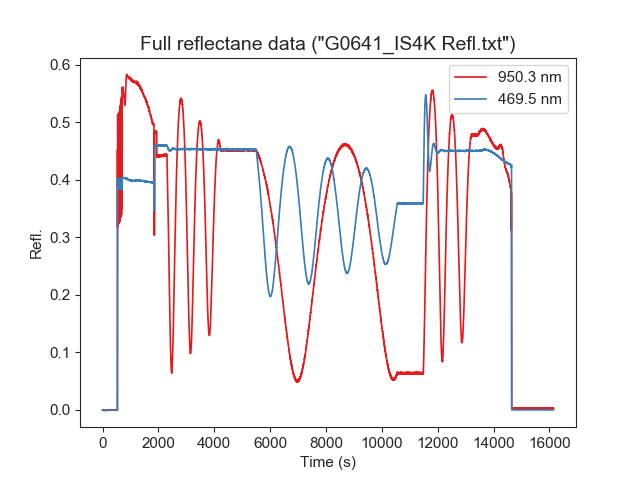

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a87dbe3508>)

In [3]:
### Set file of reflectance data

# Path to the datafile.
growth = 'G0641'
filepath = f'\\\\zw-xp1\\QNC_MBE_Data\\{growth}\\{growth}_IS4K Refl.txt'

# If your computer doesn't have access to the insitu shared drive, try:
filepath = 'G0641_IS4K Refl.txt'


### Set up Structure class.
# This class stores all the reflectance data, and info about the layers grown
# It includes functions for fitting reflectance oscillations and plotting
struct = Structure()

# Set the datafile
# You can alternatively set the data directly using set_refl_data
# However, this way is useful if you're in the middle of a growth and the data file is always being updated
# Using a file link ensures that whenever you call functions to calculate fits later, it will use the most up-to-date data 
struct.set_refl_data_file(filepath)

# Plot the full set of data from the file.
# You will need to look at this to set the time range for each layer to be fit
struct.plot_full_refl_data()

In [4]:
### Set up the layers

# Use angstroms for structure (i.e. growth rate) but nm for wavelength
struct.use_angstroms_for_structure()

# Add layers to be fitted
# Need to tell it the material, growth rate, and where it lies in the reflectance data
# Note that if "t_end" is beyond the end of the data, it will just use up to the end of the data
struct.add_layer(
    name = 'GaAs-a', 
    material = GaAs, 
    material_beneath = AlAs,
    growth_rate = 1.8, # Å/s
    t_start = 2303,
    t_end = 4214
)

struct.add_layer(
    name = 'AlAs', 
    material = AlAs,
    material_beneath = GaAs,
    growth_rate = 0.4513, # Å/s
    t_start = 5504, 
    t_end = 10542
)

struct.add_layer(
    name = 'GaAs-b', 
    material = GaAs, 
    material_beneath = AlAs,
    growth_rate = 1.8, # Å/s
    t_start = 11479, 
    t_end = 13195
)


<IPython.core.display.Javascript object>


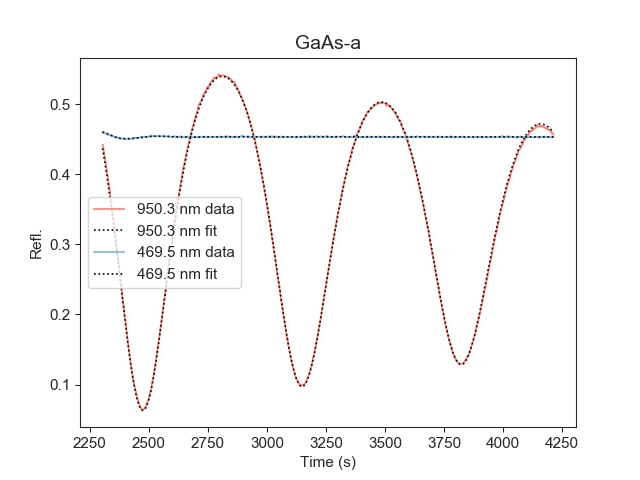

------------------------------
Layer: GaAs-a

Wavelength = 950.3 nm
n = 3.75750 (Fixed)
k = 0.10700 (Fixed)
ns = 2.71512 (Initial guess: 3.04700)
ks = 2.65568 (Initial guess: 0.00000)
G = 1.87668 Å/s (4.26025 % away from initial guess of 1.80000 Å/s)
s = 0.91189 (Initial guess: 1.00000)

Wavelength = 469.5 nm
n = 4.66700 (Fixed)
k = 1.59400 (Fixed)
ns = 4.71596 (Initial guess: 3.73410)
ks = 1.67215 (Initial guess: 0.10220)
G = 1.94685 Å/s (8.15859 % away from initial guess of 1.80000 Å/s)
s = 0.98263 (Initial guess: 1.00000)
------------------------------



<IPython.core.display.Javascript object>


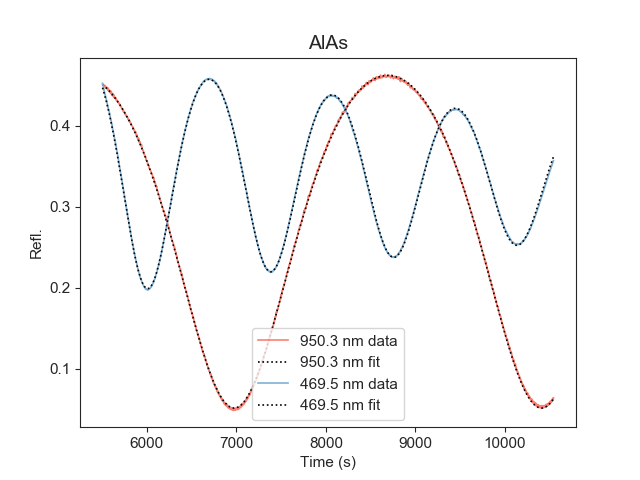

------------------------------
Layer: AlAs

Wavelength = 950.3 nm
n = 3.04700 (Fixed)
k = 0.00000 (Fixed)
ns = 5.09895 (Initial guess: 3.75750)
ks = 1.50798 (Initial guess: 0.10700)
G = 0.45429 Å/s (0.66165 % away from initial guess of 0.45130 Å/s)
s = 0.93277 (Initial guess: 1.00000)

Wavelength = 469.5 nm
n = 3.73410 (Fixed)
k = 0.10220 (Fixed)
ns = 4.54793 (Initial guess: 4.66700)
ks = 1.46768 (Initial guess: 1.59400)
G = 0.45724 Å/s (1.31711 % away from initial guess of 0.45130 Å/s)
s = 0.99816 (Initial guess: 1.00000)
------------------------------



<IPython.core.display.Javascript object>


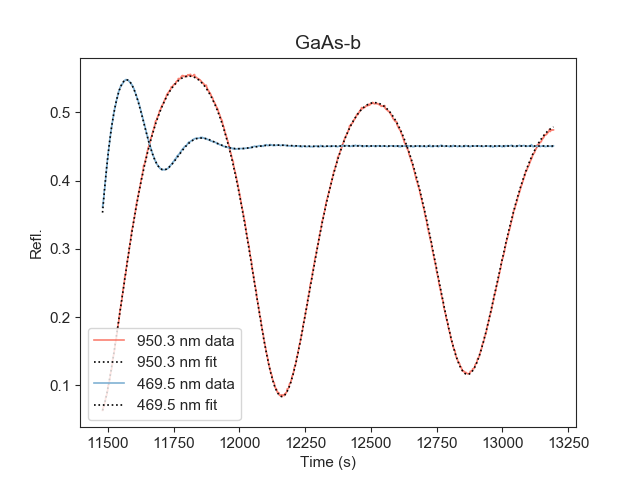

------------------------------
Layer: GaAs-b

Wavelength = 950.3 nm
n = 3.75750 (Fixed)
k = 0.10700 (Fixed)
ns = 1.63864 (Initial guess: 3.04700)
ks = -0.28635 (Initial guess: 0.00000)
G = 1.79260 Å/s (-0.41102 % away from initial guess of 1.80000 Å/s)
s = 0.90721 (Initial guess: 1.00000)

Wavelength = 469.5 nm
n = 4.66700 (Fixed)
k = 1.59400 (Fixed)
ns = 3.87941 (Initial guess: 3.73410)
ks = -0.70167 (Initial guess: 0.10220)
G = 1.77804 Å/s (-1.22001 % away from initial guess of 1.80000 Å/s)
s = 0.97693 (Initial guess: 1.00000)
------------------------------



In [5]:

# Define which parameters to fit via a comma-separated list (no spaces).
# Valid options are 'n', 'k', 'ns', 'ks', 'G', 's'
struct.set_pars_to_fit('ns,ks,G,s')

# Calculate the reflectance fits and display the results
# It will generate plots and also print out the fit results.
struct.calc_refl_fits()
struct.display_fit_results()


<IPython.core.display.Javascript object>


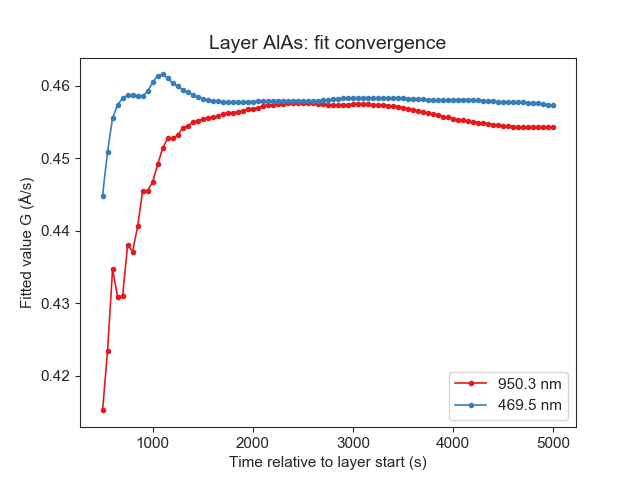

(<Figure size 640x480 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a87f8807c8>)

In [7]:
# Plot the convergence of the fit vs time for one of the layers
# This will fit from the start of the layer (t0) up to t0 + t_buffer + n*t_step
# It will do a separate fit for n = 0,1,2... until it reaches the end of the layer.
# This way you can see how the fitted value (growth rate, in this case) converges to some final value.
struct.plot_fit_convergence(
    layer_name = 'AlAs', 
    t_buffer = 500, 
    t_step = 50,
    parameter = 'G'
)